Develop a simulation model that receives the values of input parameters, generates random numbers for demand and other uncertain parameters based on the given information in the problem. 


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Parameters of sells 
fixed_cost = 100000
variable_cost = 34
Retail_price = 42
shortage_cost = 0
production = 70000

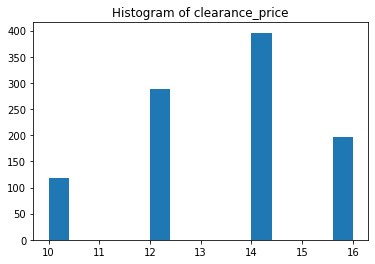

In [63]:
#Generate random numbers for the price of unsold toy
unsold_price = [10, 12, 14, 16]
prob = [0.1, 0.3, 0.4, 0.2]
num_reps = 1000

clearance_price = np.random.choice(unsold_price, num_reps, p=prob)

plt.hist(clearance_price, bins='auto')  
plt.title("Histogram of clearance_price")
plt.show()

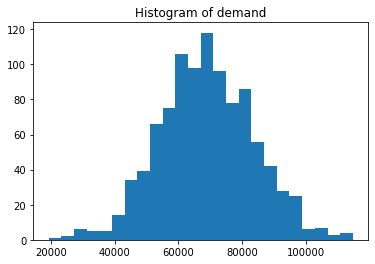

In [64]:
#Generate random numbers for demand
dem_mean = 70000
dem_std = 15000
num_reps = 1000

demand = np.random.normal(dem_mean, dem_std, num_reps).round(2)

plt.hist(demand, bins='auto')  
plt.title("Histogram of demand")
plt.show()

In [65]:
#Check the data frame
df = pd.DataFrame(index=range(num_reps), data={'Production': production,
                                               'Demand': demand})
df.head()

,Production,Demand
0,70000,109057.61
1,70000,57140.74
2,70000,73880.56
3,70000,74579.22
4,70000,58407.79


In [66]:
#Define surplus 
def surplus(x):
    if x >= 0:
        return x
    else:
        return 0

df['Surplus'] = df['Production'] - df['Demand']
df['Surplus']=df['Surplus'].apply(surplus)

df.head()

,Production,Demand,Surplus
0,70000,109057.61,0.00
1,70000,57140.74,12859.26
2,70000,73880.56,0.00
3,70000,74579.22,0.00
4,70000,58407.79,11592.21


In [67]:
#Relationships between parameters and variables

#Sales volume = minimum of production and demand
df['Sales_Vol'] = df[['Production','Demand']].min(axis=1)

#costs = fixed_cost + variable_cost * sales_vol
df['Costs'] = fixed_cost + variable_cost*df['Sales_Vol']

#Sales revenue = Sales volume * Retail price
df['Sales Revenue'] = df['Sales_Vol']*Retail_price 

#Surplus revenue = Surplus * Clearance price
df['Surplus Revenue'] = df['Surplus']*clearance_price 

#Revenues = Sales revenue + Surplus revenue
df['Revenues'] = df['Sales Revenue']+df['Surplus Revenue'] 

#Net Profit = Revenues - Costs
df['Net Profit'] = df['Revenues']+df['Costs'] 


df.head()

,Production,Demand,Surplus,Sales_Vol,Costs,Sales Revenue,Surplus Revenue,Revenues,Net Profit
0,70000,109057.61,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00
1,70000,57140.74,12859.26,57140.74,2042785.16,2399911.08,128592.60,2528503.68,4571288.84
2,70000,73880.56,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00
3,70000,74579.22,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00
4,70000,58407.79,11592.21,58407.79,2085864.86,2453127.18,185475.36,2638602.54,4724467.40


In [68]:
#Report the major outputs of the Net Profit

print('Mean: {}'.format(df['Net Profit'].mean()))

print('Standard Deviation: {}'.format(df['Net Profit'].std()))

print('Maximum Net Profit: {}'.format(df['Net Profit'].max()))

print('Minimum Net Profit: {}'.format(df['Net Profit'].min()))

Mean: 5017523.5247399965
Standard Deviation: 557713.4476826568
Maximum Net Profit: 5420000.0
Minimum Net Profit: 2267296.28


In [69]:
#Define shortage (1 if shortage happens, 0 if not)

def shortage(x):
    if x >= 0:
        return 0
    else:
        return 1

df['Shortage'] = df['Production'] - df['Demand']
df['Shortage']=df['Shortage'].apply(shortage)

df.head()

,Production,Demand,Surplus,Sales_Vol,Costs,Sales Revenue,Surplus Revenue,Revenues,Net Profit,Shortage
0,70000,109057.61,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1
1,70000,57140.74,12859.26,57140.74,2042785.16,2399911.08,128592.60,2528503.68,4571288.84,0
2,70000,73880.56,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1
3,70000,74579.22,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1
4,70000,58407.79,11592.21,58407.79,2085864.86,2453127.18,185475.36,2638602.54,4724467.40,0


In [70]:
#Probability of a Shortage
print('Probability of a Shortage: {}'.format(df['Shortage'].sum()/num_reps))

Probability of a Shortage: 0.46


In [71]:
#Define Loss (1 if loss happens, 0 if not)

def loss(x):
    if x >= 0:
        return 0
    else:
        return 1

df['Loss']=df['Net Profit'].apply(loss)

df.head()

,Production,Demand,Surplus,Sales_Vol,Costs,Sales Revenue,Surplus Revenue,Revenues,Net Profit,Shortage,Loss
0,70000,109057.61,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1,0
1,70000,57140.74,12859.26,57140.74,2042785.16,2399911.08,128592.60,2528503.68,4571288.84,0,0
2,70000,73880.56,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1,0
3,70000,74579.22,0.00,70000.00,2480000.00,2940000.00,0.00,2940000.00,5420000.00,1,0
4,70000,58407.79,11592.21,58407.79,2085864.86,2453127.18,185475.36,2638602.54,4724467.40,0,0


In [72]:
#Probability of a Loss
print('Probability of a Loss: {}'.format(df['Loss'].sum()/num_reps))

Probability of a Loss: 0.0


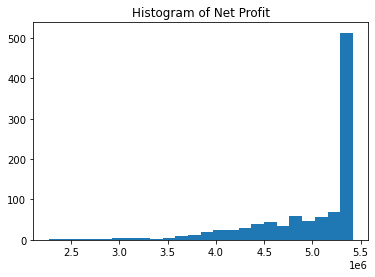

In [73]:
#Report a histogram showing the net profit
plt.hist(df['Net Profit'], bins='auto')  
plt.title("Histogram of Net Profit")
plt.show()